In [1]:
import pandas as pd
import numpy
import matplotlib as plt
from matplotlib import font_manager,rc
import matplotlib.pyplot as plt	
import seaborn as sns
import folium
import re

# 명사추출
from konlpy.tag import Twitter
from konlpy.tag import Kkma

# 워드클라우드
from wordcloud import WordCloud

In [2]:
df =pd.read_csv('./부산여행_유튜브.csv',encoding='utf-8')

In [3]:
df['title'].str[0:]

0      22년~23년 부산여행을 가장 잘하는 방법! 이 영상 하나만 보면 해결됩니다! 꼭 ...
1                      부산 주요핫플 총정리💥 Busan Travel Ι 부산여행👍
2                         [4K]본격 부산여행 가고 싶게 만드는 영상(2박3일)
3      부산 해운대 걸어서 동네한바퀴🚶‍♀️ | 상국이네 떡볶이, 전통 시장, 호랑이젤라떡...
4       [vlog] 1박2일동안 갈 곳 다 가고, 먹을 거 다 먹은 3월 부산여행 브이로그🎧🌊
                             ...                        
662    (page6)당일치기 부산 여행 1편 '흰여울문화마을'에서 만난 꿀잠 자는 고양이 ...
663                부산 요트투워 야간시간대를 타야 하는 이유 #부산여행 #shorts
664                             2022년 10월 18일#부산#여행#불꽃구경
665    [ 왈왈이 브이로그 ] 케키로그 🍰 혼자 떠나는 부산 여행 🌊그런데 이제 루시를 곁...
666    മരവിച്ചുകിടക്കുന്ന വിഷ്ണു എന്ന ഈ അധ്യാപകൻ,നെഞ്...
Name: title, Length: 667, dtype: object

In [4]:
df['title']= df['title'].str.replace(pat=r'[^\w]',repl=r' ',regex=True)
df['title']=df["title"].map(lambda x : (re.sub(' +', ' ', x)))

In [5]:
df

,title
0,22년 23년 부산여행을 가장 잘하는 방법 이 영상 하나만 보면 해결됩니다 꼭 봐야...
1,부산 주요핫플 총정리 Busan Travel Ι 부산여행
2,4K 본격 부산여행 가고 싶게 만드는 영상 2박3일
3,부산 해운대 걸어서 동네한바퀴 상국이네 떡볶이 전통 시장 호랑이젤라떡 해변열차 청사...
4,vlog 1박2일동안 갈 곳 다 가고 먹을 거 다 먹은 3월 부산여행 브이로그
...,...
662,page6 당일치기 부산 여행 1편 흰여울문화마을 에서 만난 꿀잠 자는 고양이 l...
663,부산 요트투워 야간시간대를 타야 하는 이유 부산여행 shorts
664,2022년 10월 18일 부산 여행 불꽃구경
665,왈왈이 브이로그 케키로그 혼자 떠나는 부산 여행 그런데 이제 루시를 곁들인 동네방...


In [6]:
df['title'].to_csv('./부산여행_split.csv',encoding='utf-8',index=False)

In [7]:
df['title'].str.split(' ',expand=True)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,22년,23년,부산여행을,가장,잘하는,방법,이,영상,하나만,보면,...,핫플레이스,까지,None,None,None,None,None,None,None,None
1,부산,주요핫플,총정리,Busan,Travel,Ι,부산여행,,None,None,...,None,None,None,None,None,None,None,None,None,None
2,,4K,본격,부산여행,가고,싶게,만드는,영상,2박3일,,...,None,None,None,None,None,None,None,None,None,None
3,부산,해운대,걸어서,동네한바퀴,상국이네,떡볶이,전통,시장,호랑이젤라떡,해변열차,...,None,None,None,None,None,None,None,None,None,None
4,,vlog,1박2일동안,갈,곳,다,가고,먹을,거,다,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,,page6,당일치기,부산,여행,1편,흰여울문화마을,에서,만난,꿀잠,...,None,None,None,None,None,None,None,None,None,None
663,부산,요트투워,야간시간대를,타야,하는,이유,부산여행,shorts,None,None,...,None,None,None,None,None,None,None,None,None,None
664,2022년,10월,18일,부산,여행,불꽃구경,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
665,,왈왈이,브이로그,케키로그,혼자,떠나는,부산,여행,그런데,이제,...,,None,None,None,None,None,None,None,None,None


In [8]:
# 파일로드
data = pd.read_csv('./부산여행_split.csv',encoding='utf-8')
data = data['title']

In [9]:
data

0      22년 23년 부산여행을 가장 잘하는 방법 이 영상 하나만 보면 해결됩니다 꼭 봐야...
1                       부산 주요핫플 총정리 Busan Travel Ι 부산여행 
2                          4K 본격 부산여행 가고 싶게 만드는 영상 2박3일 
3      부산 해운대 걸어서 동네한바퀴 상국이네 떡볶이 전통 시장 호랑이젤라떡 해변열차 청사...
4           vlog 1박2일동안 갈 곳 다 가고 먹을 거 다 먹은 3월 부산여행 브이로그 
                             ...                        
662     page6 당일치기 부산 여행 1편 흰여울문화마을 에서 만난 꿀잠 자는 고양이 l...
663                  부산 요트투워 야간시간대를 타야 하는 이유 부산여행 shorts
664                             2022년 10월 18일 부산 여행 불꽃구경
665     왈왈이 브이로그 케키로그 혼자 떠나는 부산 여행 그런데 이제 루시를 곁들인 동네방...
666    മരവ ച ച ക ടക ക ന ന വ ഷ ണ എന ന ഈ അധ യ പകൻ ന ഞ ച...
Name: title, Length: 667, dtype: object

In [10]:
# 데이터가져오기
f = open("./부산여행_split.csv",'rt',encoding='utf-8')
lines = f.readlines() # 한 줄을가져와서 문자열 변환
line = []
for i in range(len(lines)):
    line.append(lines[i])
f.close()

# print(line)

In [11]:
compile = re.compile("[^ ㄱ-ㅣ가-힣]+")
for i in range(len(line)):

    a = compile.sub("",line[i])
    line[i] = a
# print(line)

In [12]:
# 문장분석 okt 사용
from konlpy.tag import Okt
okt = Okt()
result =[]
result = [okt.nouns(i) for i in line] #명사만 추출
# final_result= [r for i in result for r in i]
final_result=[r for i in result for r in i if len(r)>1] # 한개는 제거
# print(final_result)

In [13]:
#많이 나온 단어
korean = pd.Series(final_result).value_counts(ascending=False).head(100)
print('키워드')
print(korean)

키워드
부산      658
부산여행    418
여행      409
맛집      191
로그      189
       ... 
니엘        8
시간        8
마루        8
조개        8
로우        8
Length: 100, dtype: int64


In [14]:
count_data = korean.to_dict()

In [15]:
from collections import Counter


count = Counter(count_data)

In [16]:
count

Counter({'부산': 658,
         '부산여행': 418,
         '여행': 409,
         '맛집': 191,
         '로그': 189,
         '브이': 184,
         '광안': 137,
         '해운대': 135,
         '카페': 91,
         '박일': 89,
         '추천': 81,
         '투어': 66,
         '마을': 60,
         '코스': 56,
         '혼자': 56,
         '흰여울': 55,
         '문화': 54,
         '캡슐': 49,
         '호텔': 47,
         '스카이': 40,
         '요트': 36,
         '뚜벅': 36,
         '먹방': 35,
         '숙소': 32,
         '친구': 31,
         '오션': 30,
         '열차': 29,
         '바다': 29,
         '일상': 26,
         '소품': 23,
         '서면': 23,
         '영도': 23,
         '기장': 23,
         '시장': 22,
         '밀면': 22,
         '돼지국밥': 22,
         '홀로': 21,
         '여행지': 20,
         '계획': 20,
         '해변': 20,
         '떡볶이': 18,
         '힐링': 18,
         '데이트': 17,
         '청사포': 17,
         '영상': 17,
         '가족': 17,
         '커플': 15,
         '롯데': 15,
         '남포동': 15,
         '막창': 15,
         '당일치기': 14,
         

In [17]:
font_path='C:/Users/admin/Downloads/nanum-all/나눔 글꼴/NanumBarunGothic.ttf'

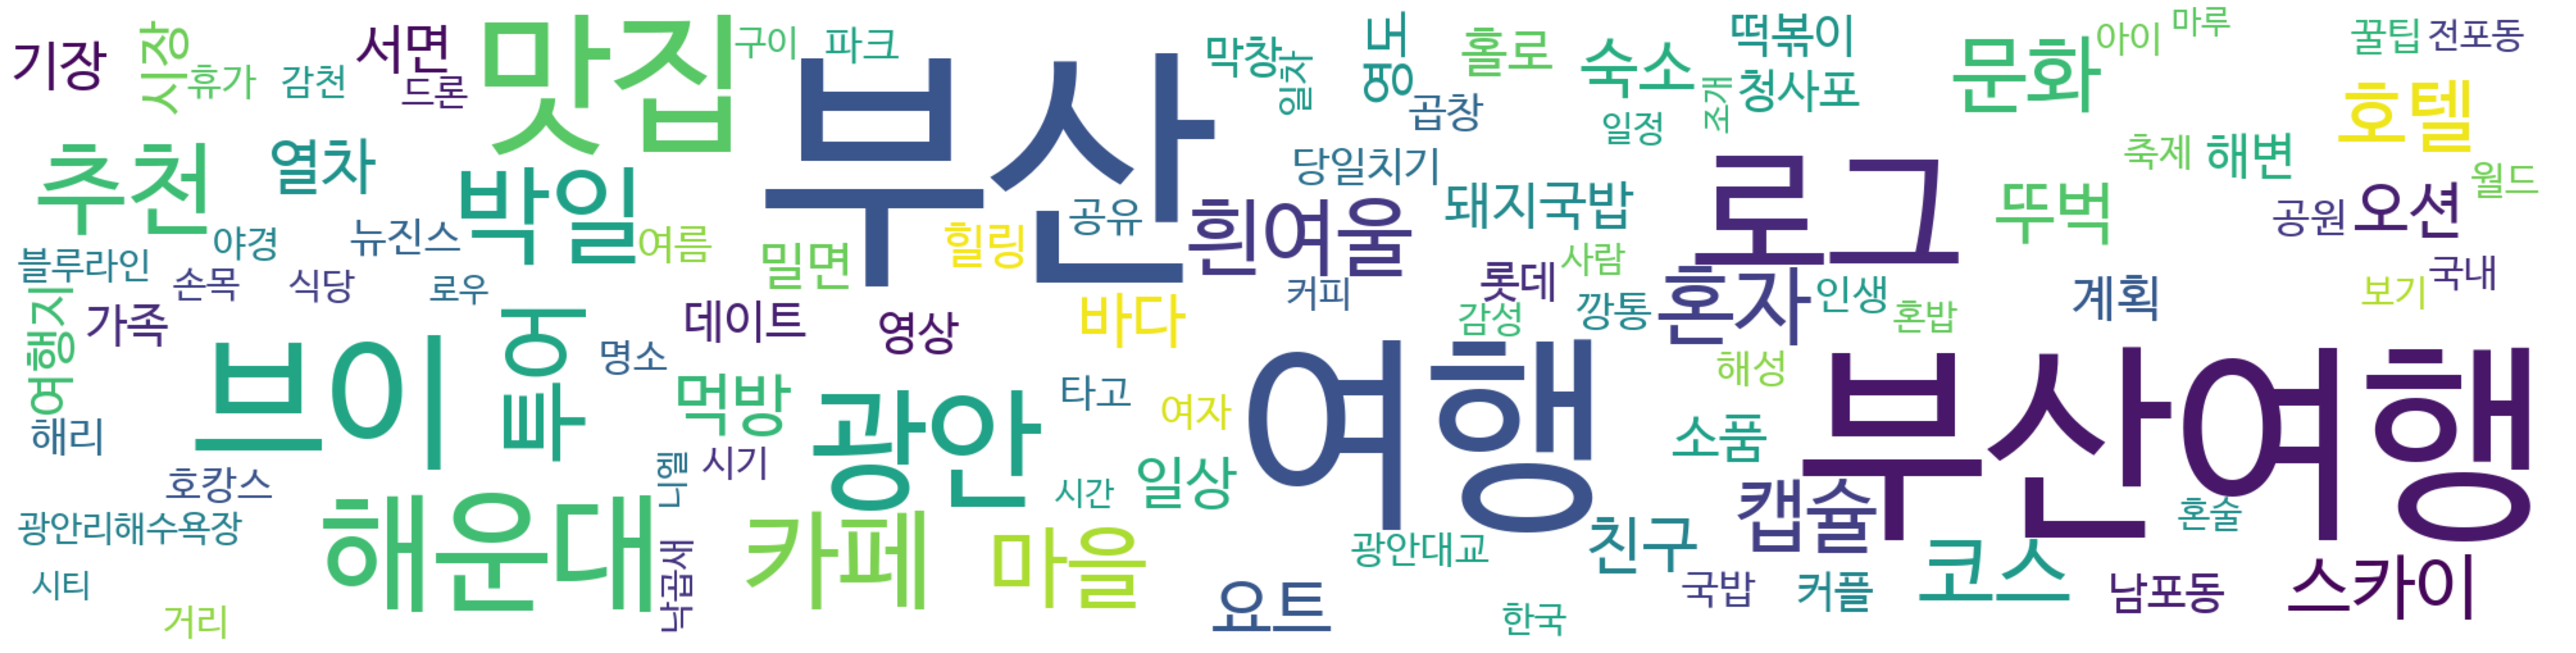

In [18]:
#wordcloud 만들기
wc = WordCloud(max_font_size=200,
	font_path = font_path,
	background_color="white",
    width=2000, height=500).generate_from_frequencies(dict(count))
    # font 경로 개별적으로 설정해야함

plt.figure(figsize = (40,40))
plt.imshow(wc)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

In [14]:
# 시리즈를 리스트로
data = data.to_list()

In [15]:
# list -> string 
data = ' '.join(data)

In [16]:
data

'22년 23년 부산여행을 가장 잘하는 방법 이 영상 하나만 보면 해결됩니다 꼭 봐야 하는 여행지 모음 부산 신상여행지 부터 야경 일몰명소 핫플레이스 까지 부산 주요핫플 총정리 Busan Travel Ι 부산여행   4K 본격 부산여행 가고 싶게 만드는 영상 2박3일  부산 해운대 걸어서 동네한바퀴 상국이네 떡볶이 전통 시장 호랑이젤라떡 해변열차 청사포역 부산국제코미디페스티벌  vlog 1박2일동안 갈 곳 다 가고 먹을 거 다 먹은 3월 부산여행 브이로그  부산여행 필수코스 18곳 부산시민은 알고 관광객만 모르는 야경 스팟 부산 갈 때 마다 무조건 가는 이색적인 곳들 카카오맵 여행지도 공유  부산여행 완전정복 권역별로 꼭 가봐야하는 부산여행지 23곳 추천 야경명소 부산카페 부산포토존 부산숙소추천 여행지 가는법과 꿀팁 Busan Travel ENG 부산여행 1박 2일로 갔다가 2 5kg 찐 썰 푼다 부산 맛집 핫플 뿌시기 본전돼지국밥 흰여울마을 1인사무소 해성막창 춘하추동밀면 브라켓테이블 네살차이 스스키노  해외반응 부산 여행을 고민한다고 말하자 부산은 완전 미친 도시야 라며 나온 외국인들의 리얼 반응 한국에 가려면 부산은 꼭 가봐  부산여행가서 시집잔소리 잔뜩 듣고 왔어요 부산꼼장어 뷰맛집 료미 송정점 Busan mukbang Vlog hagfish Somak realeatingshow  ENG 채정안의 부산스러운 부산 여행V log 1편 ㅣ왓츠 인 마이 캐리어ㅣ부산 아난티 뚜벅이들의 2박3일 부산여행 핫플 다 담아왔으니 커몬 요트투어 캡슐열차 소품샵 브런치  부산 뚜벅이 하루 여행코스 Best 8 부산 가볼만한곳 국내여행 데이트코스 추천 해동용궁사 루지 블루라인파크 해운대해수욕장 요트투어 더베이101  16년지기와 부산에서 힐링여행 호텔1 흰여울문화마을 캡슐열차 광안리 소품샵투어 해동용궁사 장씨해녀집 깡통시장 부산여행 vlog 24시간동안 서울 여행 VS 부산 여행 어디가 더 재밌을까 ㅣ파뿌리 부산 맛집 직이네 또간집 EP 9 후쿠오카vlog ㅣ일본 무비자입

In [45]:
# 문장 -> 단어 -> 키워드
n_data = Kkma().nouns(data) # 명사만

In [46]:
n_data

['22',
 '22년',
 '년',
 '23',
 '23년',
 '부산',
 '부산여행',
 '여행',
 '방법',
 '이',
 '영상',
 '하나',
 '해결',
 '여행지',
 '모음',
 '신상',
 '신상여행지',
 '터',
 '야경',
 '일몰',
 '일몰명소',
 '명소',
 '핫',
 '핫플레이스',
 '플레이스',
 '주요',
 '주요핫플',
 '플',
 '총',
 '총정리',
 '정리',
 '4',
 '본격',
 '2',
 '2박3일',
 '박',
 '3',
 '일',
 '해운대',
 '동네',
 '바퀴',
 '상국',
 '떡볶이',
 '전통',
 '시장',
 '호랑',
 '젤',
 '젤라떡',
 '라',
 '떡',
 '해변',
 '해변열차',
 '열차',
 '청사',
 '청사포역',
 '포',
 '역',
 '부산국제코미디페스티벌',
 '국제',
 '코미디',
 '페스티벌',
 '1',
 '1박2일',
 '동안',
 '곳',
 '거',
 '3월',
 '월',
 '브이',
 '브이로그',
 '로그',
 '필수',
 '필수코스',
 '코스',
 '18',
 '18곳',
 '부산시민',
 '시민',
 '관광객',
 '스팟',
 '때',
 '이색적',
 '카카오',
 '여행지도',
 '공유',
 '완전',
 '완전정복',
 '정복',
 '권역',
 '부산여행지',
 '23곳',
 '추천',
 '야경명소',
 '부산카페',
 '카페',
 '부산포토존',
 '포토',
 '존',
 '부산숙소추천',
 '숙소',
 '법과',
 '팁',
 '1박',
 '2일',
 '5',
 '맛',
 '맛집',
 '집',
 '핫플',
 '본전',
 '본전돼지국밥',
 '돼지',
 '국밥',
 '여울',
 '여울마을',
 '마을',
 '1인사무소',
 '인',
 '사무소',
 '해성',
 '해성막창',
 '막창',
 '춘하',
 '춘하추동',
 '추동',
 '브라켓',
 '브라켓테이블',
 '테이블',
 '살',
 '살차이',
 '차이',
 '스스',
 '스스키노',
 '키'

In [56]:
s_data = Kkma().sentences(data) # 문장만 추출

In [19]:
from collections import Counter


count_n_data = Counter(n_data)

In [20]:
count_n_data

Counter({'22': 1,
         '22년': 1,
         '년': 1,
         '23': 1,
         '23년': 1,
         '부산': 1,
         '부산여행': 2,
         '여행': 1,
         '방법': 1,
         '이': 2,
         '영상': 1,
         '하나': 2,
         '해결': 1,
         '여행지': 1,
         '모음': 1,
         '신상': 1,
         '신상여행지': 1,
         '터': 2,
         '야경': 1,
         '일몰': 1,
         '일몰명소': 1,
         '명소': 1,
         '핫': 1,
         '핫플레이스': 1,
         '플레이스': 1,
         '주요': 1,
         '주요핫플': 1,
         '플': 1,
         '총': 1,
         '총정리': 1,
         '정리': 1,
         '4': 1,
         '본격': 1,
         '2': 1,
         '2박3일': 1,
         '박': 2,
         '3': 1,
         '일': 3,
         '해운대': 1,
         '동네': 1,
         '바퀴': 2,
         '상국': 1,
         '떡볶이': 1,
         '전통': 1,
         '시장': 1,
         '호랑': 1,
         '젤': 1,
         '젤라떡': 1,
         '라': 1,
         '떡': 1,
         '해변': 1,
         '해변열차': 1,
         '열차': 1,
         '청사': 1,
         '청사포역': 

In [47]:
font_path='C:/Users/admin/Downloads/nanum-all/나눔 글꼴/NanumBarunGothic.ttf'

In [48]:
wordcloud = WordCloud(font_path=font_path)

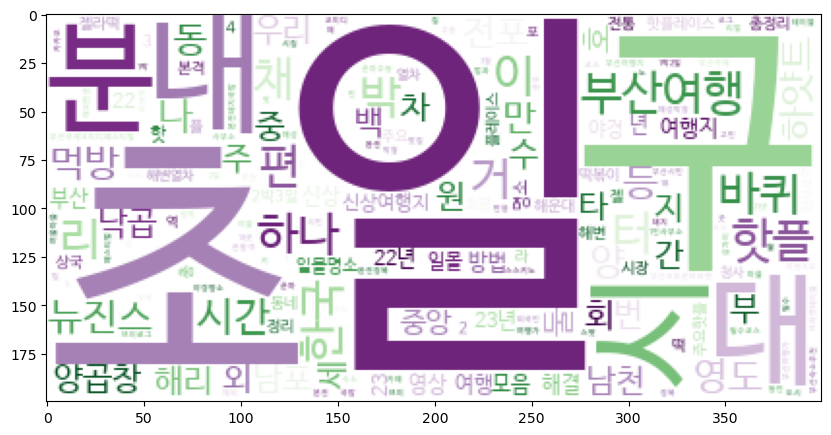

In [49]:
wordcloud = WordCloud(
    font_path = font_path, # 한글 글씨체 설정
    background_color='white', # 배경색은 흰색으로 
    colormap='PRGn', # 글씨색
    random_state=42, # 출력할때마다 같은결과 나오게
).generate_from_frequencies(dict(count_n_data))

#사이즈
plt.figure(figsize=(10,15))
plt.imshow(wordcloud)
